# COVID-19 Patients Lungs X Ray Images:

---


Name: Md. Imrul Kaye <br>
Student ID: 21MCSE010P

In [1]:
# Importing Libraryes

from skimage.io import imread, imshow, imsave
from skimage.feature import hog
from skimage import exposure
from skimage.transform import resize
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report,accuracy_score
from sklearn.metrics import confusion_matrix,ConfusionMatrixDisplay,roc_auc_score

import glob
import pandas as pd
import os
import matplotlib.pyplot as plt
import numpy as np
import pickle
import time

## Lungs X-Ray

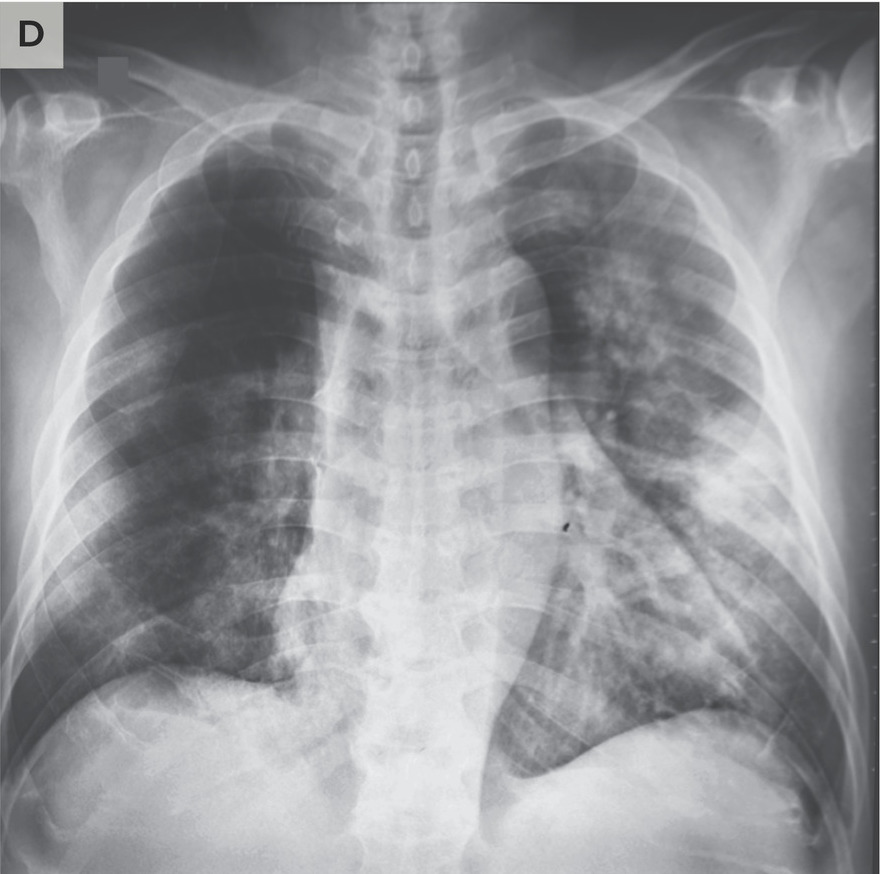

## Applicing HOG Feature detection techniques in all Normal Images

In [2]:
i = 0
for img in glob.glob("/content/drive/MyDrive/Dataset/COVID-19 Patients Lungs X Ray Images 10000/images_DATA/normal/*.jpeg"):
    img = imread(img)
    hogfv, hog_image = hog(img, orientations=9,
                        pixels_per_cell=(8, 8),
                        cells_per_block=(2, 2),
                        visualize=True,
                    )
    hog_image_rescaled = exposure.rescale_intensity(hog_image, out_range='uint8')
    filename = "/content/drive/MyDrive/Dataset/COVID-19 Patients Lungs X Ray Images 10000/hog_DATA/normal/%d.jpg"%i

    imsave(filename, hog_image_rescaled)
    i = i+1


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:12: UserWarning: /content/drive/MyDrive/Dataset/COVID-19 Patients Lungs X Ray Images 10000/hog_DATA/normal/2.jpg is a low contrast image
  if sys.path[0] == '':
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:12: UserWarning: /content/drive/MyDrive/Dataset/COVID-19 Patients Lungs X Ray Images 10000/hog_DATA/normal/4.jpg is a low contrast image
  if sys.path[0] == '':
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:12: UserWarning: /content/drive/MyDrive/Dataset/COVID-19 Patients Lungs X Ray Images 10000/hog_DATA/normal/6.jpg is a low contrast image
  if sys.path[0] == '':
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:12: UserWarning: /content/drive/MyDrive/Dataset/COVID-19 Patients Lungs X Ray Images 10000/hog_DATA/normal/8.jpg is a low contrast image
  if sys.path[0] == '':
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:12: UserWarning: /content/drive/MyDrive/Dataset/COV

## Applicing HOG Feature detection techniques in all COVID Images

In [3]:
i = 0
# For JPG
for img in glob.glob("/content/drive/MyDrive/Dataset/COVID-19 Patients Lungs X Ray Images 10000/images_DATA/covid/*.jpg"):
    img = imread(img)
    hogfv, hog_image = hog(img, orientations=9,
                        pixels_per_cell=(8, 8),
                        cells_per_block=(2, 2),
                        visualize=True,
                    )
    hog_image_rescaled = exposure.rescale_intensity(hog_image, out_range='uint8')
    filename = "/content/drive/MyDrive/Dataset/COVID-19 Patients Lungs X Ray Images 10000/hog_DATA/covid/%d.jpg"%i

    imsave(filename, hog_image_rescaled)
    i = i+1

# For JPEG
for img in glob.glob("/content/drive/MyDrive/Dataset/COVID-19 Patients Lungs X Ray Images 10000/images_DATA/covid/*.jpeg"):
    img = imread(img)
    hogfv, hog_image = hog(img, orientations=9,
                        pixels_per_cell=(8, 8),
                        cells_per_block=(2, 2),
                        visualize=True,
                    )
    
    hog_image_rescaled = exposure.rescale_intensity(hog_image, out_range='uint8')
    filename = "/content/drive/MyDrive/Dataset/COVID-19 Patients Lungs X Ray Images 10000/hog_DATA/covid/%d.jpg"%i

    imsave(filename, hog_image_rescaled)
    i = i+1

# For PNG
for img in glob.glob("/content/drive/MyDrive/Dataset/COVID-19 Patients Lungs X Ray Images 10000/images_DATA/covid/*.png"):
    img = imread(img)
    hogfv, hog_image = hog(img, orientations=9,
                        pixels_per_cell=(8, 8),
                        cells_per_block=(2, 2),
                        visualize=True,
                    )
    
    hog_image_rescaled = exposure.rescale_intensity(hog_image, out_range='uint8')
    filename = "/content/drive/MyDrive/Dataset/COVID-19 Patients Lungs X Ray Images 10000/hog_DATA/covid/%d.jpg"%i

    imsave(filename, hog_image_rescaled)
    i = i+1

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:13: UserWarning: /content/drive/MyDrive/Dataset/COVID-19 Patients Lungs X Ray Images 10000/hog_DATA/covid/1.jpg is a low contrast image
  del sys.path[0]
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:13: UserWarning: /content/drive/MyDrive/Dataset/COVID-19 Patients Lungs X Ray Images 10000/hog_DATA/covid/3.jpg is a low contrast image
  del sys.path[0]
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:13: UserWarning: /content/drive/MyDrive/Dataset/COVID-19 Patients Lungs X Ray Images 10000/hog_DATA/covid/4.jpg is a low contrast image
  del sys.path[0]
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:13: UserWarning: /content/drive/MyDrive/Dataset/COVID-19 Patients Lungs X Ray Images 10000/hog_DATA/covid/5.jpg is a low contrast image
  del sys.path[0]
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:13: UserWarning: /content/drive/MyDrive/Dataset/COVID-19 Patients Lungs X Ray I

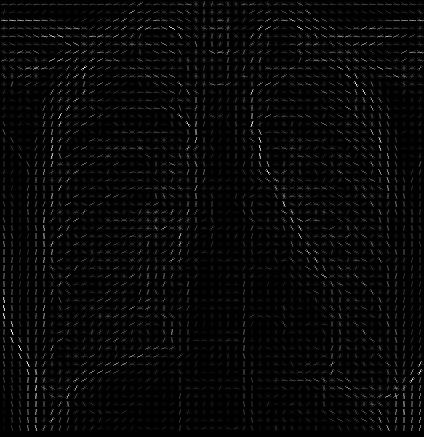

## Loding Data for Training

In [4]:
Categories=['covid','normal']
print("Type y to give categories or type n to go with classification of Cars,Ice Cream cone and Cricket ball");

while(True):
    check=input()
    if(check=='n' or check=='y'):
        break
    print("Please give a valid input (y/n)")
if(check=='y'):
    print("Enter How Many types of Images do you want to classify")
    n=int(input())
    Categories=[]
    print(f'please enter {n} names')
    for i in range(n):
        name=input()
        Categories.append(name)
    print(f"If not drive Please upload all the {n} category images in google collab with the same names as given in categories")

Type y to give categories or type n to go with classification of Cars,Ice Cream cone and Cricket ball
y
Enter How Many types of Images do you want to classify
2
please enter 2 names
covid
normal
If not drive Please upload all the 2 category images in google collab with the same names as given in categories


In [5]:
flat_data_arr=[]
target_arr=[]
#please use datadir='/content' if the files are upload on to google collab
#else mount the drive and give path of the parent-folder containing all category images folders.
datadir='/content/drive/MyDrive/Dataset/COVID-19 Patients Lungs X Ray Images 10000/hog_DATA'
for i in Categories:
    print(f'loading... category : {i}')
    path=os.path.join(datadir,i)
    for img in os.listdir(path):
        img_array=imread(os.path.join(path,img))
        img_resized=resize(img_array,(300,300))
        flat_data_arr.append(img_resized.flatten())
        target_arr.append(Categories.index(i))
    print(f'loaded category:{i} successfully')
flat_data=np.array(flat_data_arr)
target=np.array(target_arr)
df=pd.DataFrame(flat_data)
df['Target']=target

loading... category : covid
loaded category:covid successfully
loading... category : normal
loaded category:normal successfully


## Image values converted in data frame format

In [7]:
df

,0,1,2,3,4,5,6,7,8,9,...,89991,89992,89993,89994,89995,89996,89997,89998,89999,Target
0,0.002667,0.000947,0.000000,0.000000,0.000000,0.000040,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0
1,0.000000,0.000000,0.000000,0.000000,0.001902,0.000000,0.000000,0.003617,0.004686,0.022335,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.010768,0.00274,0
2,0.005187,0.002812,0.000030,0.003847,0.004131,0.000000,0.002459,0.004835,0.000000,0.014021,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0
3,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.003922,0.003922,0.003922,0.003922,0.003922,0.003922,0.003251,0.000000,0.00000,0
4,0.042484,0.043137,0.047059,0.047059,0.046614,0.046614,0.042693,0.042693,0.042693,0.042693,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
93,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,1
94,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,1
95,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,1
96,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,1


## Splitting data in test and train sets

In [8]:
x=df.iloc[:,:-1]
y=df.iloc[:,-1]

X_train, X_test, y_train, y_test = train_test_split(x , y, test_size=0.30)
print('Splitted Successfully')

Splitted Successfully


# XGBoost Classification

In [9]:
from xgboost import XGBClassifier

model = XGBClassifier()

In [10]:
%%time
model.fit(X_train, y_train)

CPU times: user 20.4 s, sys: 236 ms, total: 20.7 s
Wall time: 21.2 s


XGBClassifier()

In [11]:
%%time
predictions = model.predict(X_test)

CPU times: user 1.15 s, sys: 4.69 ms, total: 1.15 s
Wall time: 1.16 s


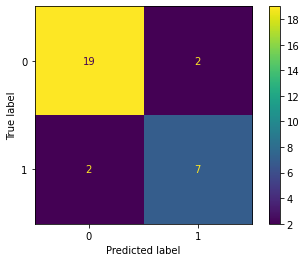

In [12]:
cm = confusion_matrix(y_test, predictions, labels=model.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm,display_labels=model.classes_)
disp.plot()

In [13]:
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

           0       0.90      0.90      0.90        21
           1       0.78      0.78      0.78         9

    accuracy                           0.87        30
   macro avg       0.84      0.84      0.84        30
weighted avg       0.87      0.87      0.87        30



In [23]:
print("AUC: ")
roc_auc_score(y_test,predictions)

AUC: 


0.6666666666666666

# **Random Forest Classification**

In [15]:
from sklearn.ensemble import RandomForestClassifier

In [16]:
model = RandomForestClassifier(n_estimators=100)

In [17]:
%%time
model.fit(X_train, y_train)

CPU times: user 857 ms, sys: 2.92 ms, total: 860 ms
Wall time: 858 ms


RandomForestClassifier()

In [18]:
%%time
predictions = model.predict(X_test)

CPU times: user 564 ms, sys: 942 µs, total: 565 ms
Wall time: 566 ms


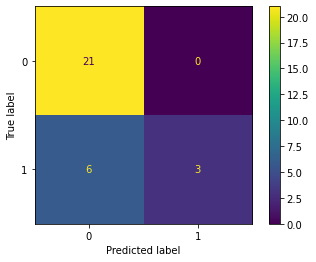

In [19]:
cm = confusion_matrix(y_test, predictions, labels=model.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm,display_labels=model.classes_)
disp.plot()

In [20]:
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

           0       0.78      1.00      0.88        21
           1       1.00      0.33      0.50         9

    accuracy                           0.80        30
   macro avg       0.89      0.67      0.69        30
weighted avg       0.84      0.80      0.76        30



In [22]:
print("AUC: ")
roc_auc_score(y_test,predictions)

AUC: 


0.6666666666666666